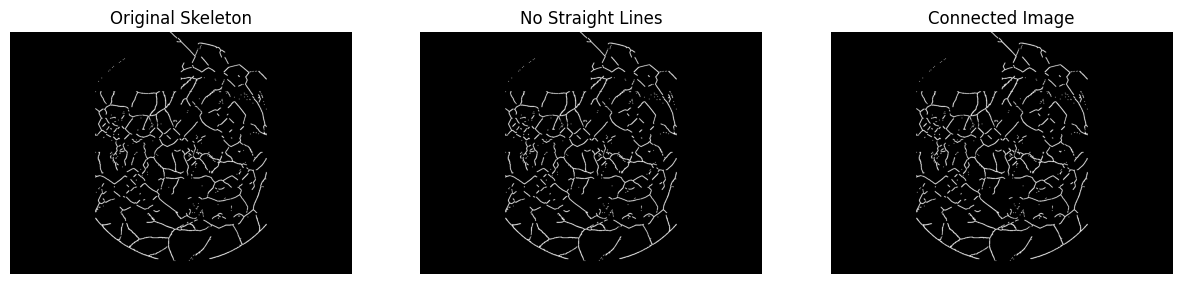

Final processed image saved to final_processed_image.png


In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

input_image_path = 'thickened_image.png'
skeleton_image = cv2.imread(input_image_path, cv2.IMREAD_GRAYSCALE)

def remove_straight_lines(image, threshold=100, min_line_length=50, max_line_gap=10):
    edges = cv2.Canny(image, 50, 150, apertureSize=3)
    lines = cv2.HoughLinesP(edges, 1, np.pi / 180, threshold, minLineLength=min_line_length, maxLineGap=max_line_gap)

    result = image.copy()
    if lines is not None:
        for line in lines:
            x1, y1, x2, y2 = line[0]
            if abs(y2 - y1) < 5 or abs(x2 - x1) < 5:
                cv2.line(result, (x1, y1), (x2, y2), 0, thickness=2)
    return result

image_no_straight_lines = remove_straight_lines(skeleton_image)

def connect_broken_lines(image, threshold=100, min_line_length=50, max_line_gap=10):
    edges = cv2.Canny(image, 50, 150, apertureSize=3)
    lines = cv2.HoughLinesP(edges, 1, np.pi / 180, threshold, minLineLength=min_line_length, maxLineGap=max_line_gap)

    result = image.copy()

    if lines is not None:
        for line in lines:
            x1, y1, x2, y2 = line[0]
            cv2.line(result, (x1, y1), (x2, y2), 255, thickness=1)
    return result

connected_image = connect_broken_lines(image_no_straight_lines)

plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
plt.title("Original Skeleton")
plt.imshow(skeleton_image, cmap="gray")
plt.axis("off")

plt.subplot(1, 3, 2)
plt.title("No Straight Lines")
plt.imshow(image_no_straight_lines, cmap="gray")
plt.axis("off")

plt.subplot(1, 3, 3)
plt.title("Connected Image")
plt.imshow(connected_image, cmap="gray")
plt.axis("off")

plt.show()

output_image_path = 'final_processed_image.png'
cv2.imwrite(output_image_path, connected_image)
print(f"Final processed image saved to {output_image_path}")
